- __ID__ - Unique number for each athlete
- __Name__ - Athlete's name
- __Sex__ - M or F
- __Age__ - Integer
- __Height__ - In centimeters
- __Weight__ - In kilograms
- __Team__ - Team name
- __NOC__ - National Olympic Committee 3-letter code
- __Games__ - Year and season
- __Year__ - Integer
- __Season__ - Summer or Winter
- __City__ - Host city
- __Sport__ - Sport
- __Event__ - Event
- __Medal__ - Gold, Silver, Bronze, or NA

In [3]:
import pandas as pd

In [4]:
# не меняем путь!
PATH = 'https://github.com/aksenov7/Kaggle_competition_group/blob/master/athlete_events.csv.zip?raw=true'

__0. Откройте файл используя необходимые параметры и не меняя переменную PATH__

In [5]:
data = pd.read_csv(PATH, compression='zip', sep=',')
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


__1. Сколько лет было самым молодым мужчинам и женщинам-участникам Олимпийских игр 1992 года ?__
- 16 и 15
- 14 и 13 
- 13 и 11
- 11 и 12

In [48]:
olympic1992 = data[data.Year == 1992]
print(olympic1992.groupby('Sex')['Age'].min())

Sex
F    12.0
M    11.0
Name: Age, dtype: float64


__2. Каков был процент баскетболистов-мужчин среди всех мужчин-участников Олимпийских игр 2012 года? Округлите ответ до первого десятичного знака.__

Здесь и далее при необходимости отбрасывайте дублированных спортсменов, чтобы считать только уникальных . 
- 0.2
- 1.5 
- 2.5
- 7.7

In [70]:
mans = data[(data.Year == 2012) & (data.Sex == 'M')]
basketball_mans = mans[data.Sport == "Basketball"]
print(f"{basketball_mans.shape[0] / mans.shape[0] * 100 : .1f}% (Не понятно)")

 2.0% (Не понятно)


C:\Users\Deeksmayker\AppData\Local\Temp\ipykernel_12004\2525794570.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  basketball_mans = mans[data.Sport == "Basketball"]


__3. Каковы среднее и стандартное отклонение роста теннисисток, участвовавших в Олимпийских играх 2000 года? Округлите ответ до первого десятичного знака.__

- 171.8 и 6.5
- 179.4 и 10
- 180.7 и 6.7
- 182.4 и 9.1 

In [35]:
tenn = data[(data.Year == 2000) & (data.Sex == 'F') & (data.Sport == "Tennis")]
print(f"Среднее: {tenn['Height'].mean() : .1f}")
print(f"Стандартное: {tenn['Height'].std() : .1f}")

Среднее:  171.8
Стандартное:  6.5


__4. Найдите спортсмена, который участвовал в Олимпийских играх 2006 года, с наибольшим весом среди других участников той же Олимпиады. Каким спортом он или она занимался?__

- Judo
- Bobsleigh 
- Skeleton
- Boxing

In [37]:
data[data.Year == 2006].sort_values('Weight', ascending=False).iloc[0]['Sport']

'Skeleton'

__5. Сколько раз John Aalberg участвовал в Олимпийских играх в разные годы?__

Один год - это один раз. Неважно сколько участий внутри одного года
- 0
- 1 
- 2
- 3 

In [43]:
data[data.Name == "John Aalberg"].drop_duplicates(["Year"]).shape[0]

2

__6. Сколько золотых медалей по теннису выиграли спортсмены сборной Switzerland на Олимпиаде-2008? Считайте каждую медаль от каждого спортсмена.__

- 0
- 1 
- 2
- 3 

In [47]:
data[(data.Year == 2008) & (data.Team == "Switzerland") & (data.Medal == "Gold") & (data.Sport == "Tennis")].shape[0]

2

__7. Правда ли, что на Олимпийских играх 2016 Spain выиграла меньше медалей, чем Италия?__ 

- Да
- Нет

In [53]:
import numpy as np
print("Да" if data[(data['Year'] == 2016) & (data['Team'] == 'Spain') & (data['Medal'] is not np.nan)].shape[0]
      < data[(data['Year'] == 2016) & (data['Team'] == 'Italy') & (data['Medal'] is not np.nan)].shape[0] else "Нет")

Да


__8. К какой возрастной категории принадлежало наименьшее и наибольшее количество участников Олимпиады-2008?__

- [45-55] и [25-35) соответственно
- [45-55] и [15-25) соответственно
- [35-45) и [25-35) соответственно
- [45-55] и [35-45) соответственно

Видимо [45-55] и [15-25]


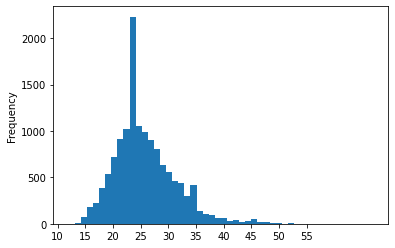

In [65]:
data[data['Year'] == 2008]['Age'].plot(bins=50, kind='hist', xticks=range(10, 60, 5))
print("Видимо [45-55] и [15-25]")

__9. Правда ли, что в Atlanta проводились летние Олимпийские игры? Правда ли, что в Squaw Valley проводились зимние Олимпийские игры? ?__

- Да, Да
- Да, Нет
- Нет, Да 
- Нет, Нет 

In [68]:
print("Да" if not data[(data.City == "Atlanta") & (data.Season == "Summer")].empty else "Нет", end=', ')
print("Да" if not data[(data.City == "Squaw Valley") & (data.Season == "Winter")].empty else "Нет")

Да, Да


__10. Какова абсолютная разница между количеством уникальных видов спорта на Олимпиаде 1986 года и Олимпиаде 2002 года?__

- 3 
- 10
- 15
- 27 

In [69]:
abs(data[data.Year == 1986].drop_duplicates(['Sport']).shape[0] - data[data.Year == 2002].drop_duplicates(['Sport']).shape[0])

15